In [1]:
import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras import layers, optimizers, Input
from tensorflow.keras.layers import *
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
emotion_df = pd.read_csv('Dataset/Emotion AI Dataset/data.csv')

In [3]:
emotion_df.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368,144 142 159 180 188 188 184 180 167 132 84 59 ...
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383,193 192 193 194 194 194 193 192 168 111 50 12 ...
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166,147 148 160 196 215 214 216 217 219 220 206 18...


In [4]:
emotion_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2140 entries, 0 to 2139
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   left_eye_center_x          2140 non-null   float64
 1   left_eye_center_y          2140 non-null   float64
 2   right_eye_center_x         2140 non-null   float64
 3   right_eye_center_y         2140 non-null   float64
 4   left_eye_inner_corner_x    2140 non-null   float64
 5   left_eye_inner_corner_y    2140 non-null   float64
 6   left_eye_outer_corner_x    2140 non-null   float64
 7   left_eye_outer_corner_y    2140 non-null   float64
 8   right_eye_inner_corner_x   2140 non-null   float64
 9   right_eye_inner_corner_y   2140 non-null   float64
 10  right_eye_outer_corner_x   2140 non-null   float64
 11  right_eye_outer_corner_y   2140 non-null   float64
 12  left_eyebrow_inner_end_x   2140 non-null   float64
 13  left_eyebrow_inner_end_y   2140 non-null   float

In [5]:
emotion_df['Image'].shape

(2140,)

In [6]:
emotion_df['Image'] = emotion_df['Image'].apply(lambda x: np.fromstring(x, dtype = int, sep = ' ').reshape(96, 96))

In [7]:
emotion_df['Image'][0].shape

(96, 96)

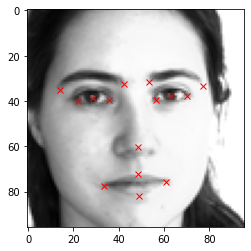

In [8]:
i = np.random.randint(1, len(emotion_df))
plt.imshow(emotion_df['Image'][i], cmap='gray')
for j in range(1,31,2):
    plt.plot(emotion_df.loc[i][j-1],emotion_df.loc[i][j],'rx')

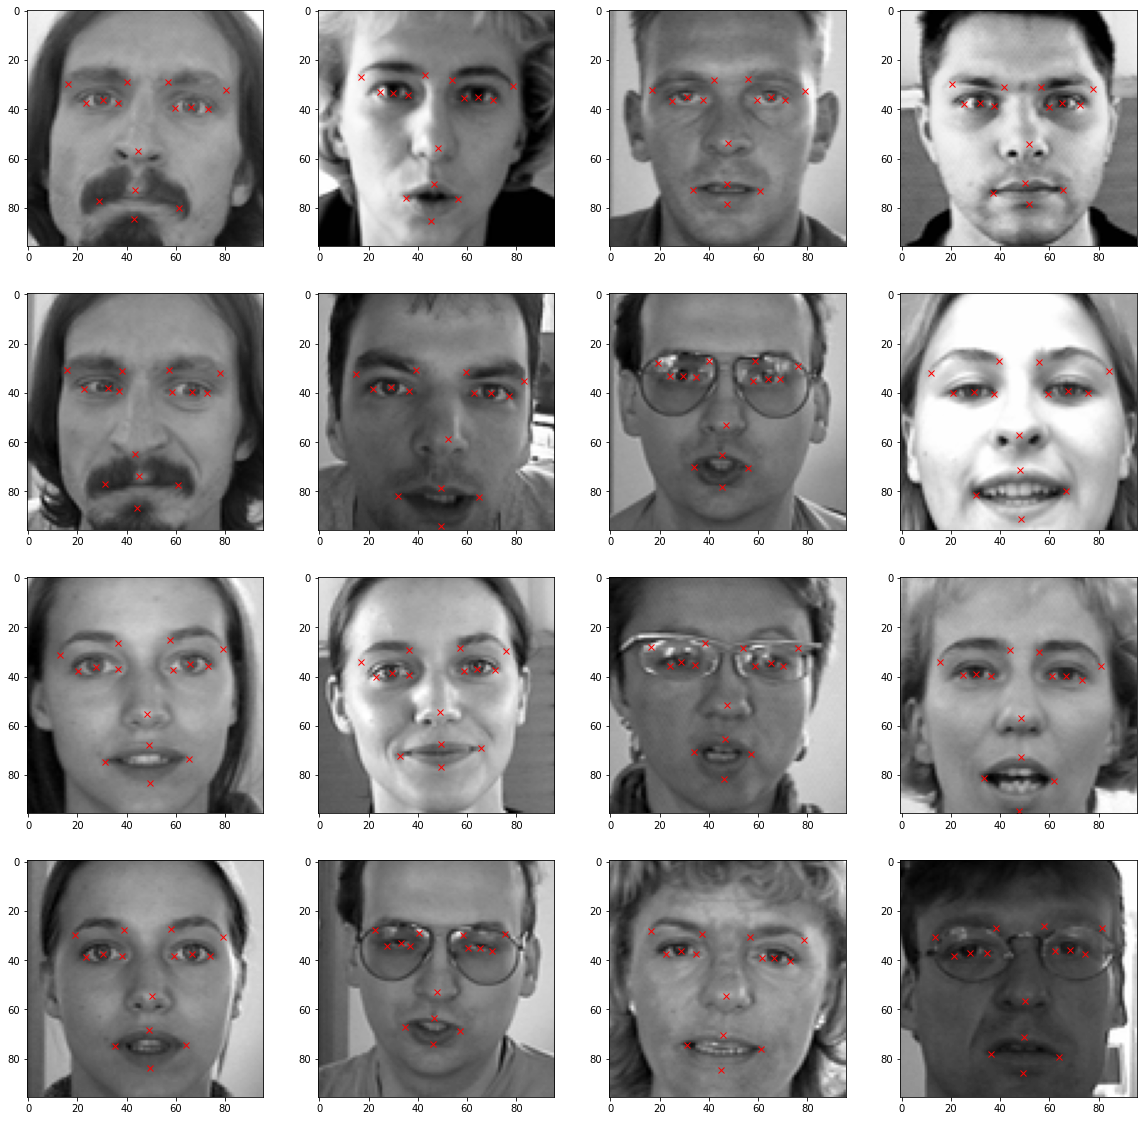

In [9]:
fig = plt.figure(figsize=(20,20))

for i in range(16):
    ax = fig.add_subplot(4,4,i+1)
    plt.imshow(emotion_df['Image'][i], cmap='gray')
    for j in range(1,31,2):
        plt.plot(emotion_df.loc[i][j-1],emotion_df.loc[i][j],'rx')

In [10]:
import copy
emotion_df_copy = copy.copy(emotion_df)

In [11]:
columns = emotion_df_copy.columns[:-1]

In [12]:
emotion_df_copy['Image'] = emotion_df_copy['Image'].apply(lambda x: np.flip(x, axis=1))

for i in range(len(columns)):
    if i%2 == 0:
        emotion_df_copy[columns[i]] = emotion_df_copy[columns[i]].apply(lambda x: 96. - float(x))

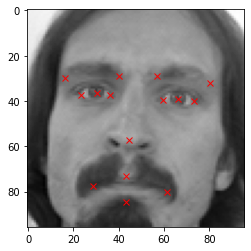

In [13]:
plt.imshow(emotion_df['Image'][0], cmap = 'gray')
for i in range(1,31,2):
    plt.plot(emotion_df.loc[0][i-1], emotion_df.loc[0][i], 'rx')

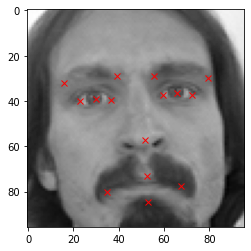

In [14]:
plt.imshow(emotion_df_copy['Image'][0], cmap = 'gray')
for i in range(1,31,2):
    plt.plot(emotion_df_copy.loc[0][i-1], emotion_df_copy.loc[0][i], 'rx')

In [15]:
augmented_df = np.concatenate((emotion_df, emotion_df_copy))

In [16]:
import random

emotion_df_copy = copy.copy(emotion_df)
emotion_df_copy['Image'] = emotion_df_copy['Image'].apply(lambda x: np.clip(random.uniform(1.5,2)*x,0.0, 255.0))
augmented_df = np.concatenate((augmented_df, emotion_df_copy))
augmented_df.shape

(6420, 31)

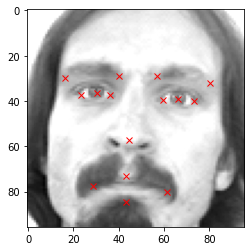

In [17]:
plt.imshow(emotion_df_copy['Image'][0], cmap='gray')
for i in range(1,31,2):
    plt.plot(emotion_df_copy.loc[0][i-1],emotion_df_copy.loc[0][i], 'rx')

In [108]:
Image = augmented_df[:,30]

Image = Image/255.

X= np.empty((len(Image),96, 96, 1))

for i in range(len(Image)):
    X[i,] = np.expand_dims(Image[i], axis = 2)
    
X  = np.asarray(X).astype(np.float32)
X.shape

(6420, 96, 96, 1)

In [109]:
y = augmented_df[:,:30]
y = np.asarray(y).astype(np.float32)
y.shape

(6420, 30)

In [110]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [111]:
def res_block(X, filter, stage):
    X_copy = X
    
    f1, f2, f3 = filter
    
    # Convolution Block
    # Main Path
    X = Conv2D(f1, (1,1), strides = (1,1), name= 'res_'+str(stage)+'_conv_a', kernel_initializer= glorot_uniform(seed=0))(X)
    X = MaxPool2D(2,2)(X)
    X = BatchNormalization(axis=3, name= 'bn_'+str(stage)+'_conv_a')(X)
    X = Activation('relu')(X)
    
    X = Conv2D(f2, kernel_size = (3,3),strides =(1,1), padding='same', name= 'res_'+str(stage)+'_conv_b', kernel_initializer= glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name='bn_'+str(stage)+'_conv_b')(X)
    X = Activation('relu')(X)
    
    X = Conv2D(f3, kernel_size = (1,1), strides=(1,1), padding='same', name= 'res_'+str(stage)+'_conv_c', kernel_initializer= glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name='bn_'+str(stage)+'_conv_c')(X)
    
    # Short Path
    X_copy = Conv2D(f3, kernel_size = (1,1), strides=(1,1), name='res_'+str(stage)+'_conv_copy', kernel_initializer = glorot_uniform(seed=0))(X_copy)
    X_copy = MaxPool2D((2,2))(X_copy)
    X_copy = BatchNormalization(axis =3, name='bn_'+str(stage)+'_conv_copy')(X_copy)
    
    # Add and activation
    X = Add()([X,X_copy])
    X = Activation('relu')(X)
    
    # Identity Block
    X_copy = X
    
    # Main Path
    X = Conv2D(f1,(1,1), strides=(1,1), name= 'res_'+str(stage)+'_identity_1_a', kernel_initializer= glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name='bn_'+str(stage)+'_identity_1_a')(X)
    X = Activation('relu')(X)
    
    X = Conv2D(f2, kernel_size=(3,3),strides=(1,1), padding = 'same', name='res_'+str(stage)+'_identity_1_b', kernel_initializer= glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name='bn_'+str(stage)+'_identity_1_b')(X)
    X = Activation('relu')(X)
    
    X = Conv2D(f3, kernel_size = (1,1), strides=(1,1), name= 'res_'+str(stage)+'_identity_1_c', kernel_initializer= glorot_uniform(seed = 0))(X)
    X = BatchNormalization(axis=3, name = 'bn_'+str(stage)+'_identity_1_c')(X)
    
    # Add
    X = Add()([X,X_copy])
    X = Activation('relu')(X)
    
    # Identity Block 2
    X_copy = X
    
    # Main Path
    X = Conv2D(f1 ,(1,1), strides = (1,1), name='res_'+str(stage)+'_identity_2_a', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name='bn_'+str(stage)+'_identity_2_a')(X)
    X = Activation('relu')(X)
    
    X = Conv2D(f2, kernel_size =(3,3), strides = (1,1), padding = 'same', name ='res_'+str(stage)+'_identity_2_b', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name='bn_'+str(stage)+'_identity_2_b')(X)
    X = Activation('relu')(X)
    
    X = Conv2D(f3, kernel_size = (1,1), strides = (1,1), name = 'res_'+str(stage)+'_identity_2_c', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name ='bn_'+str(stage)+'_identity-2_c')(X)
    
    # Add
    X = Add()([X,X_copy])
    X = Activation('relu')(X)
    
    return X

In [112]:
input_shape = (96,96,1)

# Input tensor shape
X_input = Input(input_shape)

# Zero-paddding
X = ZeroPadding2D((3,3))(X_input)

X = Conv2D(64, (7,7), strides = (2,2), name = 'conv1', kernel_initializer= glorot_uniform(seed=0))(X)
X = BatchNormalization(axis= 3, name ='bn_conv1')(X)
X = Activation('relu')(X)
X = MaxPooling2D((3,3), strides=(2,2))(X)

X = res_block(X, filter=[64,64,256], stage = 2)

X = res_block(X, filter=[128,128,512], stage = 3)

X = AveragePooling2D((2,2), name = 'Average_Pooling')(X)

X = Flatten()(X)
X = Dense(4096, activation = 'relu')(X)
X = Dropout(0.2)(X)
X = Dense(2048, activation = 'relu')(X)
X = Dropout(0.1)(X)
X = Dense(30, activation ='relu')(X)


model_1_FacialKeyPoints = Model(inputs = X_input, outputs = X)
model_1_FacialKeyPoints.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 96, 96, 1)]  0                                            
__________________________________________________________________________________________________
zero_padding2d_2 (ZeroPadding2D (None, 102, 102, 1)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 48, 48, 64)   3200        zero_padding2d_2[0][0]           
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 48, 48, 64)   256         conv1[0][0]                      
____________________________________________________________________________________________

In [113]:
Adam = tf.keras.optimizers.Adam(learning_rate = 1e-5, beta_1 = 0.9, beta_2 = 0.999, amsgrad = False)
model_1_FacialKeyPoints.compile(optimizer = Adam, loss = 'mean_squared_error', metrics = ['accuracy'])

In [114]:
filepath = 'FacialKeyPoints_weights.hdf5'
checkpoint = ModelCheckpoint(filepath, verbose =1, save_best_only = True )


In [272]:
history = model_1_FacialKeyPoints.fit(X_train, y_train, batch_size = 32, epochs=2, validation_split = 0.05, callbacks =[checkpoint])

Epoch 1/2
153/153 [==============================] - ETA: 0s - loss: 106.0239 - accuracy: 0.5968
Epoch 00001: val_loss improved from 116.57957 to 88.19100, saving model to FacialKeyPoints_weights.hdf5
153/153 [==============================] - 104s 682ms/step - loss: 106.0239 - accuracy: 0.5968 - val_loss: 88.1910 - val_accuracy: 0.6265
Epoch 2/2
153/153 [==============================] - ETA: 0s - loss: 80.4621 - accuracy: 0.5899
Epoch 00002: val_loss improved from 88.19100 to 85.42826, saving model to FacialKeyPoints_weights.hdf5
153/153 [==============================] - 103s 672ms/step - loss: 80.4621 - accuracy: 0.5899 - val_loss: 85.4283 - val_accuracy: 0.6459


In [273]:
model_json = model_1_FacialKeyPoints.to_json()
with open('FacialKeyPoints-model.json','w') as json_file:
    json_file.write(model_json)

In [274]:
 with open('FacialKeyPoints-model.json', 'r') as json_file:
        savedModel = json_file.read()

model_1_FacialKeyPoints = tf.keras.models.model_from_json(savedModel)
model_1_FacialKeyPoints.load_weights('FacialKeyPoints_weights.hdf5')
model_1_FacialKeyPoints.compile(optimizer = Adam, loss = 'mean_squared_error', metrics = ['accuracy'])

In [275]:
result = model_1_FacialKeyPoints.evaluate(X_test, y_test)
print('Accuracy : {}'.format(result[1]))

41/41 [==============================] - 5s 126ms/step - loss: 82.7365 - accuracy: 0.6542
Accuracy : 0.6542056202888489


In [119]:
pred = model_1_FacialKeyPoints.predict(X_test)

In [120]:
y_test

array([[65.4503  , 34.5033  , 27.201534, ..., 77.95857 , 49.022312,
        78.9826  ],
       [66.29422 , 35.07351 , 26.172   , ..., 74.79867 , 46.034668,
        83.73689 ],
       [66.42934 , 37.132267, 29.782667, ..., 72.36533 , 47.072   ,
        82.431335],
       ...,
       [25.886124, 43.388523, 65.254906, ..., 81.84047 , 55.97177 ,
        84.130615],
       [65.894264, 36.80744 , 31.074783, ..., 70.384   , 47.862957,
        80.64348 ],
       [30.084541, 38.091064, 68.22813 , ..., 75.39902 , 47.34658 ,
        89.87706 ]], dtype=float32)

In [121]:
pred

array([[55.454044, 35.235374, 36.669746, ..., 71.94076 , 46.48132 ,
        77.67004 ],
       [61.473362, 34.138523, 28.912708, ..., 69.05691 , 44.7747  ,
        75.88737 ],
       [51.0027  , 33.87783 , 37.720688, ..., 66.619896, 44.504868,
        76.52357 ],
       ...,
       [47.37122 , 36.683144, 47.57146 , ..., 74.07445 , 48.06933 ,
        81.395035],
       [54.286858, 35.3812  , 38.851913, ..., 72.35277 , 47.586414,
        80.002815],
       [41.343018, 35.57913 , 51.086243, ..., 69.16102 , 46.31664 ,
        80.94412 ]], dtype=float32)

In [29]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

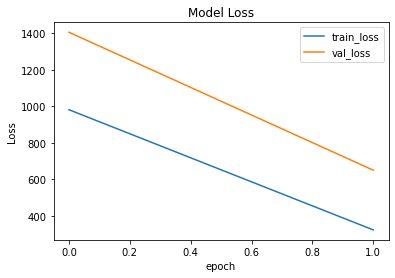

In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train_loss','val_loss'], loc = 'upper right')
plt.show()

In [31]:
facialexpression_df = pd.read_csv('Dataset/Emotion AI Dataset/icml_face_data.csv')

In [32]:
facialexpression_df.head()

,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
3,2,20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...
4,3,77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...


In [33]:
facialexpression_df[' pixels']

0        70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1        151 150 147 155 148 133 111 140 170 174 182 15...
2        24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
3        20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...
4        77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...
                               ...                        
24563    0 39 81 80 104 97 51 64 68 46 41 67 53 68 70 5...
24564    181 177 176 156 178 144 136 132 122 107 131 16...
24565    178 174 172 173 181 188 191 194 196 199 200 20...
24566    17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...
24567    30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...
Name:  pixels, Length: 24568, dtype: object

In [34]:
def stringtoarray(x):
    return np.array(x.split(' ')).reshape(48,48,1).astype('float32')

def resize(x):
    img = x.reshape(48,48)
    return cv2.resize(img, dsize=(96,96), interpolation = cv2.INTER_CUBIC)

In [35]:
facialexpression_df[' pixels'] = facialexpression_df[' pixels'].apply(lambda x: stringtoarray(x))

In [36]:
facialexpression_df[' pixels'] = facialexpression_df[' pixels'].apply(lambda x: resize(x))

In [37]:
facialexpression_df.head()

,emotion,pixels
0,0,"[[69.316925, 73.03865, 79.13719, 84.17186, 85...."
1,0,"[[151.09435, 150.91393, 150.65791, 148.96367, ..."
2,2,"[[23.061905, 25.50914, 29.47847, 33.99843, 36...."
3,2,"[[20.083221, 19.079437, 17.398712, 17.158691, ..."
4,3,"[[76.26172, 76.54747, 77.001785, 77.7672, 78.4..."


In [38]:
facialexpression_df.shape

(24568, 2)

In [39]:
facialexpression_df.isnull().sum()

emotion    0
 pixels    0
dtype: int64

In [40]:
label_label = {0:'anger', 1: 'disgust', 2: 'sad', 3: 'happiness', 4: 'surprise'}

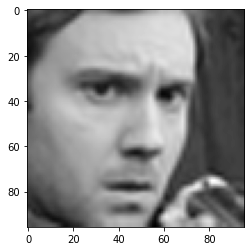

In [41]:
plt.imshow(facialexpression_df[' pixels'][0], cmap='gray')

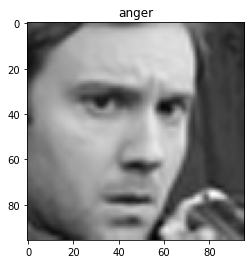

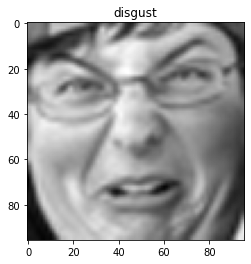

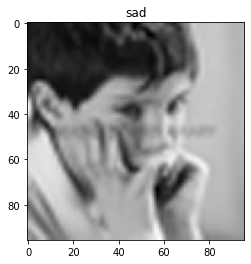

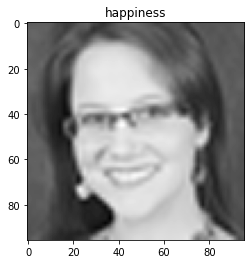

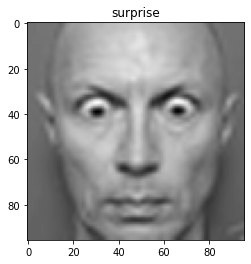

In [42]:
emotions = [0,1,2,3,4]

for i in emotions:
    data = facialexpression_df[facialexpression_df['emotion'] == i][:1]
    img = data[' pixels'].item()
    img = img.reshape(96,96)
    plt.figure()
    plt.title(label_label[i])
    plt.imshow(img, cmap ='gray')

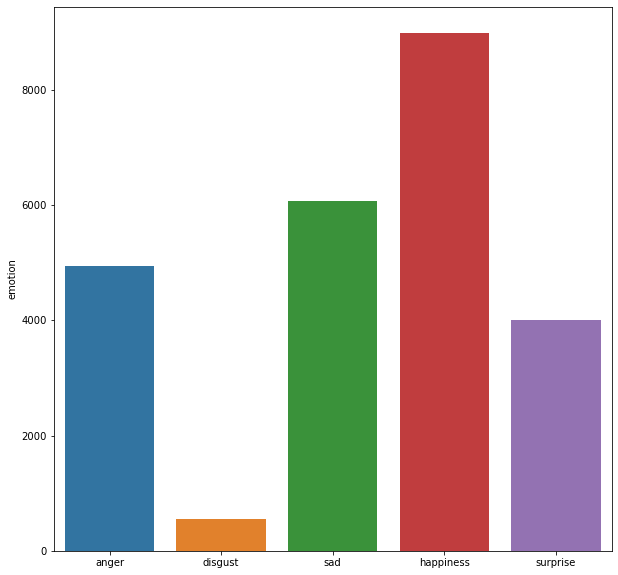

In [43]:
labels = ['anger','disgust','sad','happiness', 'surprise']
value = facialexpression_df['emotion'].value_counts(sort = False)
plt.figure(figsize = (10,10))
sns.barplot(labels,value)

In [44]:
from keras.utils import to_categorical

X = facialexpression_df[' pixels']
y = to_categorical(facialexpression_df['emotion'])

In [45]:
X[0]

array([[ 69.316925,  73.03865 ,  79.13719 , ...,  40.73619 ,  40.6584  ,
         40.5394  ],
       [ 68.66325 ,  70.95224 ,  74.71768 , ...,  43.274765,  42.037186,
         41.223618],
       [ 67.768814,  67.71646 ,  67.67172 , ...,  47.39473 ,  44.26329 ,
         42.31465 ],
       ...,
       [ 74.89021 ,  76.79553 ,  79.90259 , ...,  71.463425,  59.32875 ,
         51.74736 ],
       [ 76.68126 ,  75.808105,  74.25452 , ...,  93.943375,  79.77934 ,
         71.13246 ],
       [ 77.63858 ,  75.15074 ,  70.8846  , ..., 107.66351 ,  92.23212 ,
         82.91585 ]], dtype=float32)

In [46]:
X = np.stack(X, axis=0)
X = X.reshape(24568, 96, 96 ,1)

print(X.shape, y.shape)

(24568, 96, 96, 1) (24568, 5)


In [47]:
from sklearn.model_selection import train_test_split

X_Train, X_Test, y_Train, y_Test = train_test_split(X,y, test_size = 0.1, shuffle = True)
X_val, X_Test, y_val, y_Test = train_test_split(X_Test, y_Test, test_size = 0.5, shuffle =True)

In [48]:
print(X_val.shape, y_val.shape)

(1228, 96, 96, 1) (1228, 5)


In [49]:
print(X_Test.shape, y_Test.shape)

(1229, 96, 96, 1) (1229, 5)


In [50]:
print(X_Train.shape, y_Train.shape)

(22111, 96, 96, 1) (22111, 5)


In [51]:
X_Train = X_Train/255
X_Test = X_Test/255
X_val = X_val/255

In [52]:
X_Train

array([[[[0.01629902],
         [0.02205051],
         [0.03079613],
         ...,
         [0.04812125],
         [0.05193978],
         [0.05433284]],

        [[0.01925863],
         [0.02558582],
         [0.03541822],
         ...,
         [0.04009657],
         [0.04384065],
         [0.04613635]],

        [[0.02425872],
         [0.03159192],
         [0.04330708],
         ...,
         [0.02669145],
         [0.03037642],
         [0.03254921]],

        ...,

        [[0.05028591],
         [0.05230186],
         [0.05569829],
         ...,
         [0.85167307],
         [0.8668706 ],
         [0.87598896]],

        [[0.12693864],
         [0.10556281],
         [0.07041183],
         ...,
         [0.85101056],
         [0.8534333 ],
         [0.8547443 ]],

        [[0.17316368],
         [0.13764247],
         [0.07918049],
         ...,
         [0.85072416],
         [0.8450972 ],
         [0.8414849 ]]],


       [[[0.23575135],
         [0.23573734],
         [0.23

In [53]:
train_datagen = ImageDataGenerator(
rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

In [54]:
input_shape = (96,96,1)

X_input = Input(input_shape)

X = ZeroPadding2D((3,3))(X_input)

X = Conv2D(64, (7,7), strides= (2,2), name = 'conv1', kernel_initializer = glorot_uniform(seed=0))(X)
X = BatchNormalization(axis = 3, name = 'bn_conv1')(X)
X = Activation('relu')(X)
X = MaxPooling2D((3,3), strides=(2,2))(X)

X = res_block(X, filter = [64,64,256], stage = 2)

X = res_block(X, filter = [128,128,512], stage = 3)

# X = res_block(X, filter = [256,256,1024], stage = 4)

X = AveragePooling2D((4,4), name = 'Average_Pooling')(X)

X = Flatten()(X)
x = Dense(512, activation ='relu'),
X = Dense(5, activation = 'softmax', name = 'Dense_final', kernel_initializer = glorot_uniform(seed=0))(X)


model_2_emotion = Model( inputs= X_input, outputs = X, name = 'ResNet18')

model_2_emotion.summary()

Model: "ResNet18"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 96, 96, 1)]  0                                            
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, 102, 102, 1)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 48, 48, 64)   3200        zero_padding2d_1[0][0]           
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 48, 48, 64)   256         conv1[0][0]                      
___________________________________________________________________________________________

In [55]:
model_2_emotion.compile(optimizer = 'Adam', loss ='categorical_crossentropy', metrics = ['accuracy'])

In [56]:
earlystopping = EarlyStopping(monitor ='val_loss', mode = 'min', verbose = 1, patience=20)

checkpointer = ModelCheckpoint(filepath = 'FacialExpression_weights.hdf5', verbose = 1, save_best_only= True)

In [271]:
Callbacks = [earlystopping, checkpointer]
history = model_2_emotion.fit(train_datagen.flow(X_Train,y_Train,batch_size = 64),
                             validation_data=(X_val,y_val), steps_per_epoch = len(X_Train)//64,
                             epochs = 2, callbacks = Callbacks)

Epoch 1/2
345/345 [==============================] - ETA: 0s - loss: 0.8342 - accuracy: 0.6760
Epoch 00001: val_loss improved from 0.99779 to 0.90420, saving model to FacialExpression_weights.hdf5
345/345 [==============================] - 374s 1s/step - loss: 0.8342 - accuracy: 0.6760 - val_loss: 0.9042 - val_accuracy: 0.6515
Epoch 2/2
345/345 [==============================] - ETA: 0s - loss: 0.8058 - accuracy: 0.6882
Epoch 00002: val_loss did not improve from 0.90420
345/345 [==============================] - 370s 1s/step - loss: 0.8058 - accuracy: 0.6882 - val_loss: 1.1010 - val_accuracy: 0.5668


In [276]:
model_json = model_2_emotion.to_json()
with open('FacialExpression-model.json', 'w') as json_file:
    json_file.write(model_json)

In [277]:
with open('Facialexpression-model.json', 'r') as json_file:
    json_savedModel = json_file.read()


In [278]:
model_2_emotions = tf.keras.models.model_from_json(json_savedModel)
model_2_emotions.load_weights('FacialExpression_weights.hdf5')
model_2_emotions.compile(optimizer = 'Adam', loss ='categorical_crossentropy', metrics = ['accuracy'])

In [279]:
score = model_2_emotions.evaluate(X_Test, y_Test)
print('Test Accuracy: {}'.format(score[1]))

39/39 [==============================] - 4s 102ms/step - loss: 0.9223 - accuracy: 0.6477
Test Accuracy: 0.6476810574531555


In [62]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [63]:
accuracy = history.history['accuracy']
loss  = history.history['loss']
val_accuracy = history.history['val_accuracy']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training Accuracy')

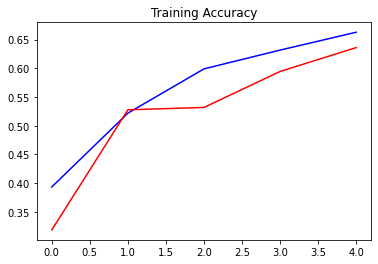

In [64]:
plt.plot(range(len(accuracy)),accuracy, 'b-')
plt.plot(range(len(val_accuracy)), val_accuracy, 'r-')
plt.title('Training Accuracy')

Text(0.5, 1.0, 'Training Accuracy')

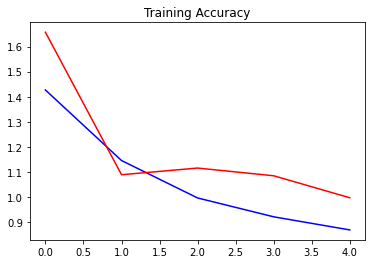

In [65]:
plt.plot(range(len(loss)),loss, 'b-')
plt.plot(range(len(val_loss)), val_loss, 'r-')
plt.title('Training Accuracy')

In [66]:
predictions = model_2_emotions.predict(X_Test)

In [67]:
predictions

array([[1.56075945e-02, 1.02348502e-04, 2.42604781e-03, 9.44971681e-01,
        3.68923172e-02],
       [4.84650165e-01, 8.28422979e-03, 4.78660882e-01, 1.97033044e-02,
        8.70150886e-03],
       [2.40048558e-01, 3.33433098e-04, 3.51282628e-03, 6.19854450e-01,
        1.36250734e-01],
       ...,
       [1.64808368e-03, 3.11903896e-05, 5.73771540e-04, 9.95779395e-01,
        1.96749857e-03],
       [5.31295203e-02, 5.69618016e-04, 8.82776201e-01, 5.73625267e-02,
        6.16218895e-03],
       [5.02377868e-01, 8.18525907e-03, 4.66218144e-02, 1.80152506e-01,
        2.62662530e-01]], dtype=float32)

In [68]:
predicted_classes = np.argmax(predictions, axis = 1)
predicted_classes

array([3, 0, 3, ..., 3, 2, 0], dtype=int64)

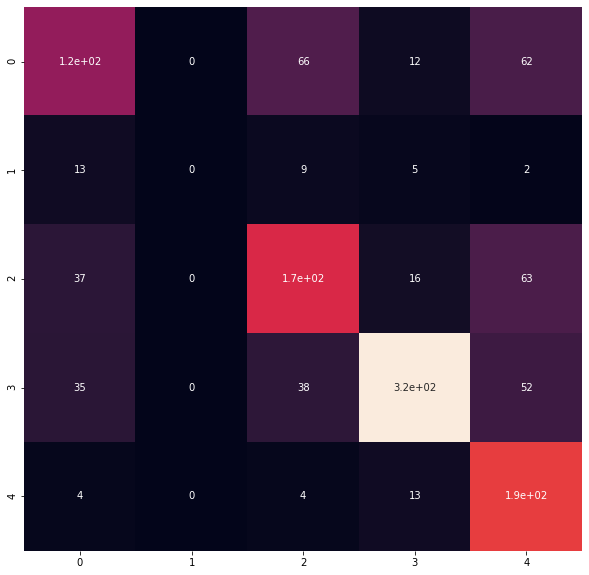

In [86]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(np.argmax(y_Test,axis=-1), predicted_classes)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot = True, cbar=False)

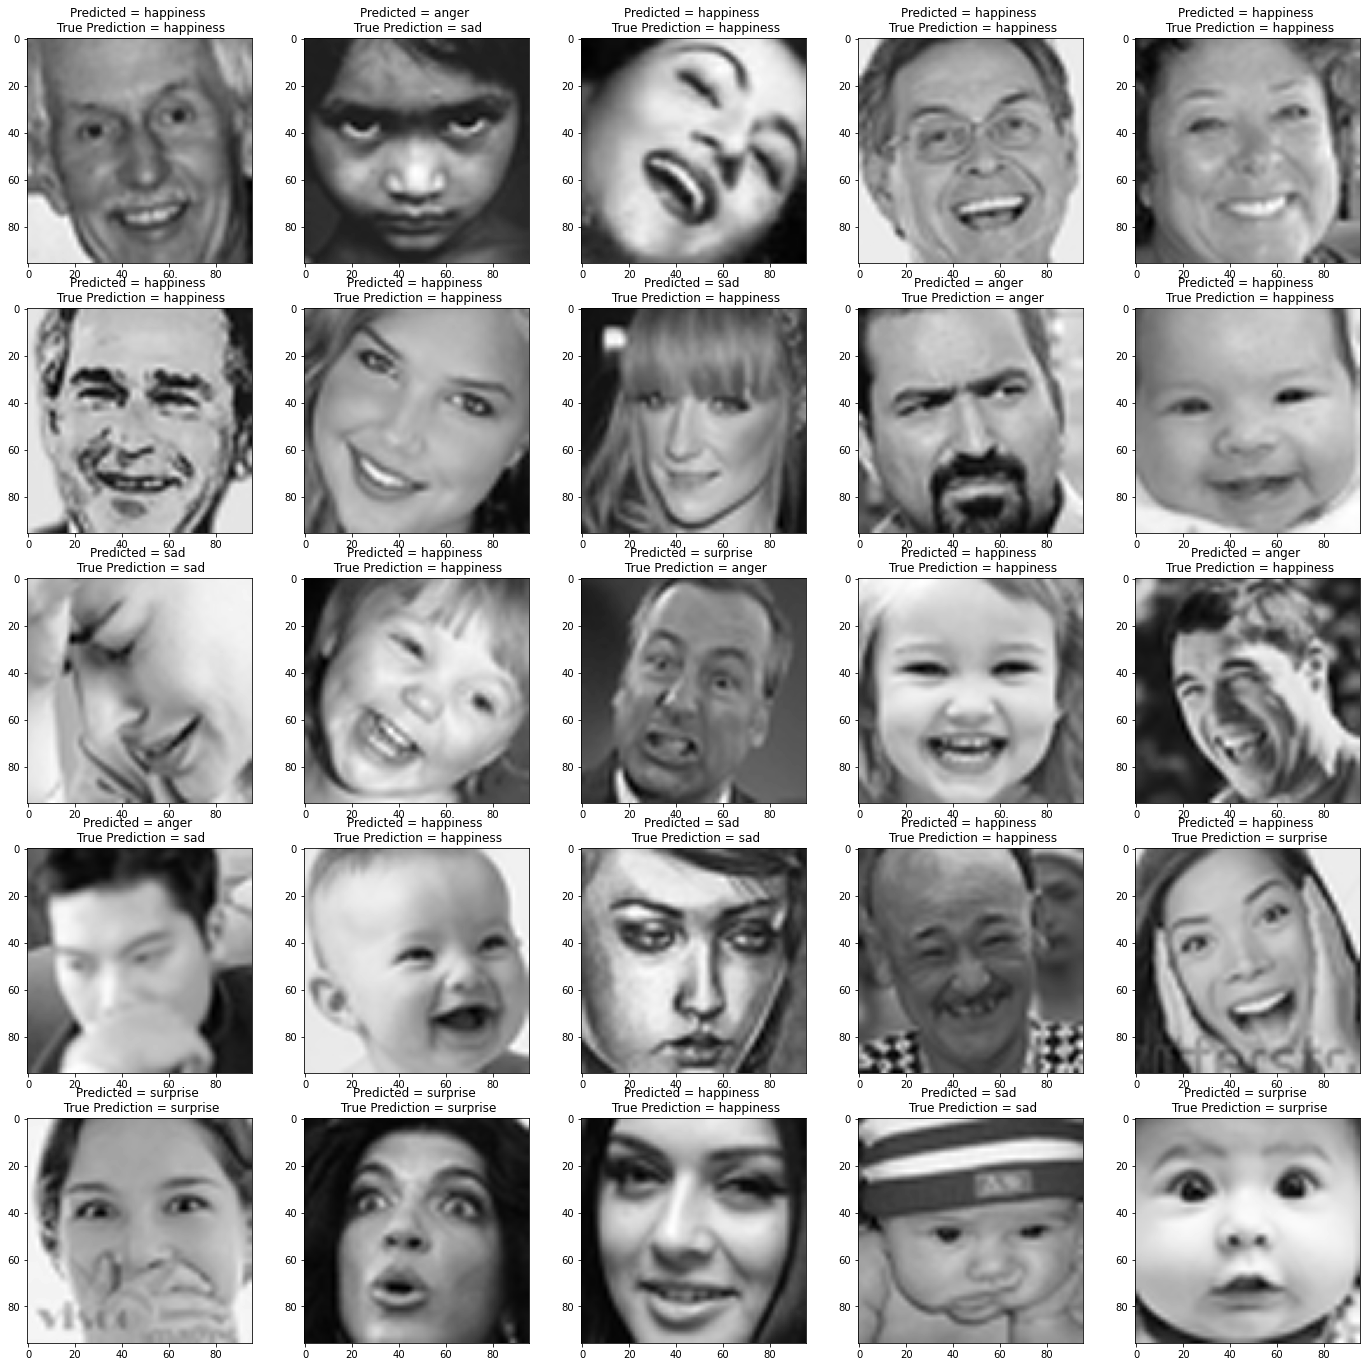

In [70]:
fig,ax = plt.subplots(5,5, figsize =(24,24))
image = 0
ax = ax.ravel()
for i in range(25):
    ax[i].imshow(X_Test[i].reshape(96,96), cmap='gray')
    ax[i].set_title('Predicted = {} \n True Prediction = {}'.format(label_label[predicted_classes[i]], label_label[np.argmax(y_Test[i])]))
    
    

In [71]:
from sklearn.metrics import classification_report
print(classification_report(np.argmax(y_Test, axis=-1), predicted_classes))

              precision    recall  f1-score   support

           0       0.57      0.46      0.51       258
           1       0.00      0.00      0.00        29
           2       0.60      0.60      0.60       289
           3       0.87      0.72      0.79       443
           4       0.51      0.90      0.65       210

    accuracy                           0.65      1229
   macro avg       0.51      0.53      0.51      1229
weighted avg       0.66      0.65      0.64      1229



c:\python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [280]:
def predict(X_test):
    df_predict = model_1_FacialKeyPoints.predict(X_test)
    df_emotion = np.argmax(model_2_emotions.predict(X_test), axis = -1)
    
    df_emotion = np.expand_dims(df_emotion, axis=1)
    
    df_predict = pd.DataFrame(df_predict, columns = columns)
    
    df_predict['emotion'] = df_emotion
    
    return df_predict

In [122]:
df_predict = predict(X_test)

In [123]:
df_predict.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,emotion
0,55.454044,35.235374,36.669746,35.598747,50.714622,35.674618,59.030724,36.319630,40.492722,36.834839,...,55.859089,54.733608,72.534233,37.842533,73.523163,46.491055,71.940758,46.481319,77.670036,2
1,61.473362,34.138523,28.912708,34.686993,55.034889,35.162319,68.761978,34.413376,34.816574,36.317245,...,53.500145,58.970215,71.124573,32.475887,71.408768,45.014793,69.056908,44.774700,75.887367,4
2,51.002701,33.877831,37.720688,34.283825,48.733421,35.503532,52.720673,36.392128,40.865875,35.243515,...,52.381748,50.885273,70.753242,39.459145,70.149551,45.008118,66.619896,44.504868,76.523567,4
3,51.687695,34.917198,38.666306,35.443180,49.247246,35.592381,53.201164,36.077980,42.790340,36.228420,...,54.224247,51.600819,72.063210,40.286411,73.445328,45.917595,70.452873,45.867123,78.825516,2
4,52.220127,35.029205,39.836418,35.866127,49.672516,35.128254,54.253750,35.190697,41.356609,36.273647,...,55.743744,51.749294,73.013145,41.835770,73.390030,44.755096,71.782043,45.553204,77.289291,4


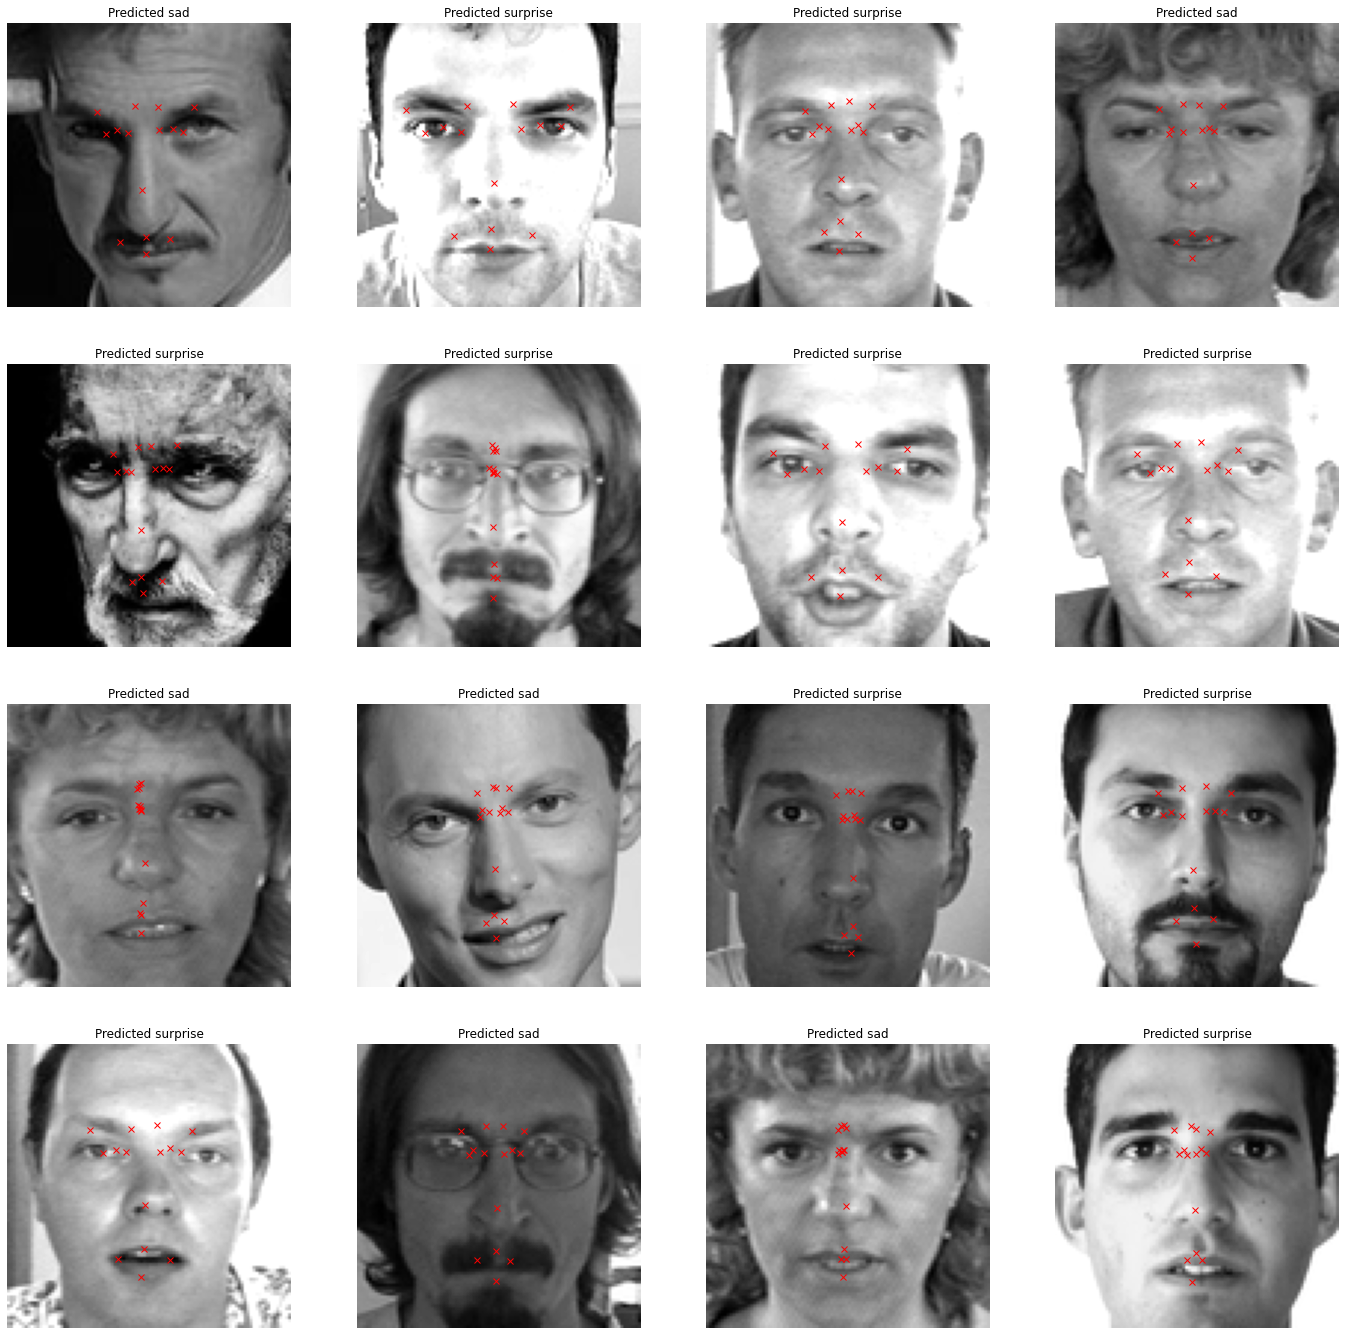

In [125]:
fig,ax = plt.subplots(4,4, figsize=(24,24))
ax = ax.ravel()

for i in range(16):
    ax[i].imshow(X_test[i].squeeze(), cmap='gray')
    ax[i].set_title('Predicted {}'.format(label_label[df_predict['emotion'][i]]))
    ax[i].axis('off')
    for j in range(1,31,2):
        ax[i].plot(df_predict.loc[i][j-1], df_predict.loc[i][j],'rx')

In [249]:
cobs = 'cobs/'
img_array = []
import os
for fn in os.listdir(cobs):
    img_array1 = cv2.imread(os.path.join(cobs,fn), cv2.IMREAD_GRAYSCALE )
    img_array1 = cv2.resize(img_array1,(96,96))
    img_array.append(img_array1)
#     plt.imshow(img_array,cmap='gray')
#     plt.show()

In [250]:
# img_array.shape

In [251]:
# plt.imshow(img_array,cmap='gray')
# plt.show()

In [252]:
# img_array = cv2.resize(img_array,(96,96))

In [253]:
img_array = np.asarray(img_array)

In [254]:
img_array = img_array/255

Xi= np.empty((len(img_array),96, 96, 1))

for i in range(len(img_array)):
    Xi[i,] = np.expand_dims(img_array[i], axis = 2)
    
Xi  = np.asarray(Xi).astype(np.float32)
Xi.shape

(2, 96, 96, 1)

In [281]:
pred = predict(Xi)

In [269]:
pred

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,emotion
0,52.980591,34.496586,37.384537,35.174473,49.649632,34.811604,57.541565,35.460026,40.341774,36.022449,...,54.173374,53.591297,70.19162,37.541763,72.195854,44.730675,68.900169,44.351135,75.097473,2
1,40.786396,33.658749,47.027725,34.787899,41.347736,34.887688,39.968407,34.732380,46.126781,35.352100,...,52.621754,41.806778,71.15490,47.021076,70.781067,44.218479,65.700348,43.710964,75.285767,2


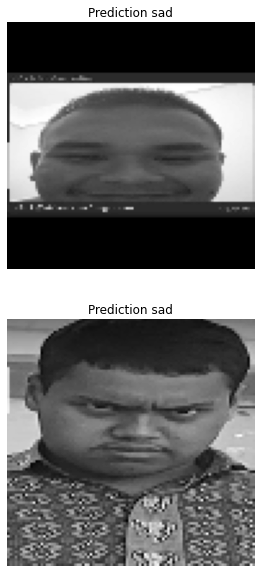

In [270]:
fig,ax = plt.subplots(2,1,figsize = (10,10))
ax = ax.ravel()

for i in range(2):
    ax[i].imshow(img_array[i], cmap='gray')
    ax[i].set_title('Prediction {}'.format(label_label[pred['emotion'][i]]))
    ax[i].axis('off')
#     for j in range(1,31,2):
#         ax[i].plot(pred.loc[i][j-1], pred.loc[i][j],'rx')